Plot CWOP correlation data
---

In [5]:
import pandas as pd
import os
from numpy import intersect1d
import matplotlib.pyplot as plt
import geopandas as gpd


correlation_file = '../nearby_station_correlations.csv'
correlations = pd.read_csv(correlation_file)

correlations.rename(columns={'Call/CW':'name'}, inplace = True)

correlations.info()
correlations.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    13 non-null     object 
 1   lat     13 non-null     float64
 2   lon     13 non-null     float64
 3   tempc   11 non-null     float64
dtypes: float64(3), object(1)
memory usage: 548.0+ bytes


,name,lat,lon,tempc
0,CW4957,42.59550,-72.59033,NaN
1,CW5324,42.40000,-72.50000,0.712256
2,DW0929,42.08000,-72.48450,0.740392
3,DW3637,42.14633,-72.57867,0.750690
4,DW7061,42.43750,-72.43200,0.836718


In [ ]:
water = gpd.read_file('../naturalearthdata/USA_Detailed_Water_Bodies.shp')


In [9]:
import matplotlib.cm as cm

In [13]:
correlations

,name,lat,lon,tempc
0,CW4957,42.59550,-72.59033,NaN
1,CW5324,42.40000,-72.50000,0.712256
2,DW0929,42.08000,-72.48450,0.740392
3,DW3637,42.14633,-72.57867,0.750690
4,DW7061,42.43750,-72.43200,0.836718
5,EW5291,42.25183,-72.38567,0.786637
6,EW8484,42.22367,-72.37450,0.760808
7,FW2825,42.28017,-72.70167,0.693685
8,FW3821,42.50050,-72.76800,0.839690
9,FW6610,42.31617,-72.66483,0.729768


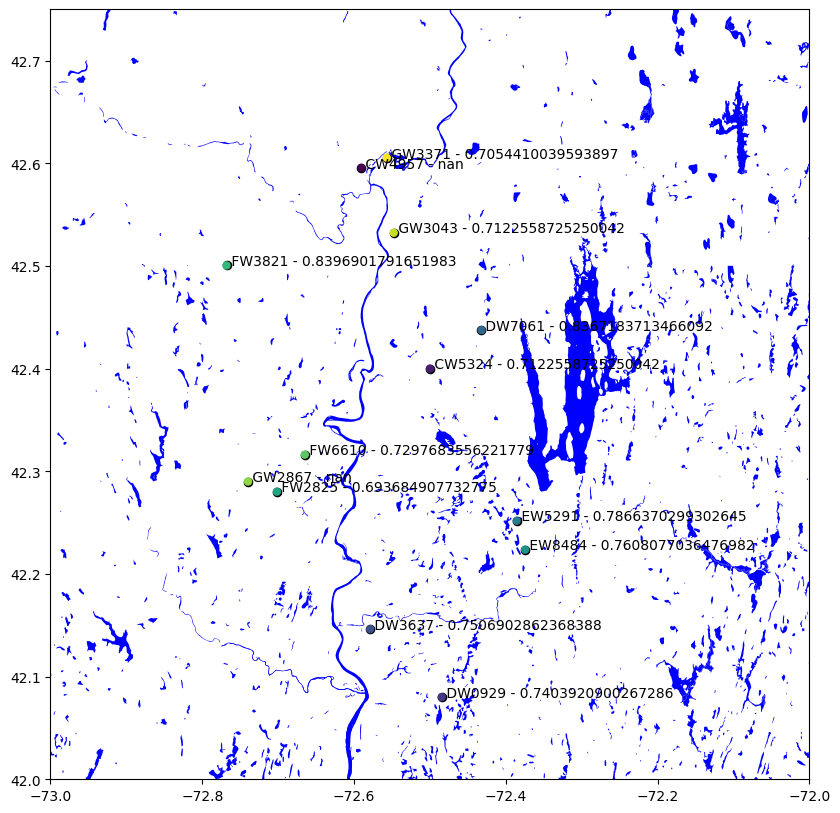

In [12]:

#plot the map
fig, ax = plt.subplots(figsize=(10,10))
# ax.set_xlim(-74, -71)
# ax.set_ylim(41.5, 43.5)

ax.set_xlim(-73, -72)
ax.set_ylim(42, 42.75)

water.plot(ax=ax, color='blue')

#make gpd points from the matching weather stations
point_xys = [
    [record['lon'], record['lat']]
    for index, record in correlations.iterrows()
]
station_points = gpd.GeoDataFrame(
    {"geometry": gpd.points_from_xy(correlations['lon'],correlations['lat'])},
    crs="EPSG:4326"
)

colormap = cm.viridis
# color = colormap(.8)

station_points.plot(ax=ax, color = 'black', markersize=35)
station_points.plot(ax=ax, cmap = colormap, markersize=25)

for index, station in correlations.iterrows():
    plt.text(x= station['lon'], y=station['lat'], s=f" {station['name']} - {station['tempc']}")

Possible (public) locations:
- Herman Covey mgmt area
- Swift river mgmt area
- Quabbin Park
- Warner Road cons area
    - probably not
- Arcadia bog
- Jabish Brook ccons area
- Lawrence Swamp
- Topping Farm
- Whitney Cons. area
- Buffam Falls
- Heatherstone brook
- Brushy Mountain